<a href="https://colab.research.google.com/github/Mahrokh-Eb/Machine-Learning-With-Python/blob/master/1_1_1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#!pip3 install bcolz 

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
%cd /content/drive/MyDrive/numpy/cifar-10-batches-py

/content/drive/MyDrive/numpy/cifar-10-batches-py


In [104]:
import numpy as np

In [105]:
!python --version

Python 3.7.12


In [106]:
print(np.__version__)

1.19.5


In [107]:
#dir(np)

In [108]:
#help(np.where)

In [109]:
#np.where?

In [110]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [111]:
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [112]:
print(np.where(x>5, x, 0))

[[0 0 0]
 [0 0 6]
 [7 8 9]]


In [113]:
print(np.array([1,2,3]))

[1 2 3]


In [114]:
print(type)

<class 'type'>


In [115]:
print(type(x))

<class 'numpy.ndarray'>


In [116]:
A = np.array([[1,2,3], [4,5,6]])

In [117]:
print(A)

[[1 2 3]
 [4 5 6]]


In [118]:
print(type(A))

<class 'numpy.ndarray'>


In [119]:
print(A.shape)

(2, 3)


In [120]:
print(x.shape)

(3, 3)


In [121]:
print(x.shape[0])

3


In [122]:
 print(np.reshape(A, (3,2)))

[[1 2]
 [3 4]
 [5 6]]


## **Reshape a matrix from column to row vector**

In [123]:
print(np.reshape(A,(1, -1)))

[[1 2 3 4 5 6]]


In [124]:
print(np.reshape(A, (-1, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [125]:
 print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Reshape to two-dimenssion

In [126]:
y = np.array([1,2,3])

In [127]:
print(y[ None, :])

[[1 2 3]]


In [128]:
print(y[:, None])

[[1]
 [2]
 [3]]


In [129]:
print(y[:, np.newaxis])

[[1]
 [2]
 [3]]


# Array dimenssion

In [130]:
print(x.ndim)

2


In [131]:
print(y.ndim)

1


# Data type

In [132]:
print(x.dtype)

int64


In [133]:
c= np.array([1,2,3], dtype=np.float32)

In [134]:
print(c)

[1. 2. 3.]


In [135]:
print(np.arange(1, 20, step=2))

[ 1  3  5  7  9 11 13 15 17 19]


In [136]:
#np.arange?

In [137]:
print(np.linspace(1,2, num=5))

[1.   1.25 1.5  1.75 2.  ]


In [138]:
print(np.logspace(2, 5, 10, base=2))

[ 4.    5.04  6.35  8.   10.08 12.7  16.   20.16 25.4  32.  ]


In [139]:
np.set_printoptions(formatter={'all':lambda x: '%.2f' %x})

In [140]:
print(np.logspace(2, 5, 10, base=2))

[4.00 5.04 6.35 8.00 10.08 12.70 16.00 20.16 25.40 32.00]


# Creating specific arrays

In [141]:
print(np.zeros(shape=(2,3), dtype=np.int32))

[[0.00 0.00 0.00]
 [0.00 0.00 0.00]]


In [142]:
print(5 * np.ones(shape=(2,3)))

[[5.00 5.00 5.00]
 [5.00 5.00 5.00]]


In [143]:
print(np.reshape(np.arange(1, 10), (3,3)))

[[1.00 2.00 3.00]
 [4.00 5.00 6.00]
 [7.00 8.00 9.00]]


In [144]:
print(np.fliplr(np.eye(4,4)))

[[0.00 0.00 0.00 1.00]
 [0.00 0.00 1.00 0.00]
 [0.00 1.00 0.00 0.00]
 [1.00 0.00 0.00 0.00]]


# Create random arrays

In [145]:
print(np.random.randn(3,3))

[[0.20 -0.36 -0.22]
 [-0.45 -0.75 1.04]
 [-0.09 -0.05 0.80]]


In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

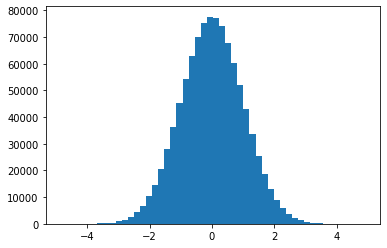

In [147]:
 x = np.random.randn(1000000)
 plt.hist(x, bins=50);

In [148]:
print(np.count_nonzero(np.random.randint(6, size=(2, 4))))

8


In [149]:
#help(np.abs)

In [150]:
x = np.array([1,2,3])
print(x)

[1.00 2.00 3.00]


In [151]:
print(x.shape)

(3,)


In [152]:
y = np.array([[1,2,3], [4,5,6]])
print(y)

[[1.00 2.00 3.00]
 [4.00 5.00 6.00]]


In [153]:
print(np.reshape(y, (1, -1)))

[[1.00 2.00 3.00 4.00 5.00 6.00]]


In [154]:
print(x.size)

3


In [155]:
import keras
import os

In [156]:
import os
import pickle

def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y
    
def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []
    
    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    # load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [157]:
X_train, y_train, X_test, y_test = load_cifar10('/content/drive/MyDrive/numpy/cifar-10-batches-py')

In [158]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [159]:
print(y_train[:10])

[6.00 9.00 9.00 4.00 1.00 1.00 2.00 7.00 8.00 3.00]


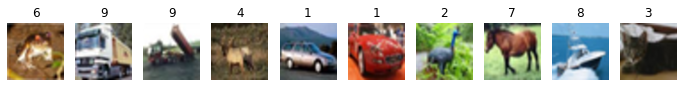

In [160]:
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

In [161]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


# Visualize data

In [162]:
 class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'track'] 

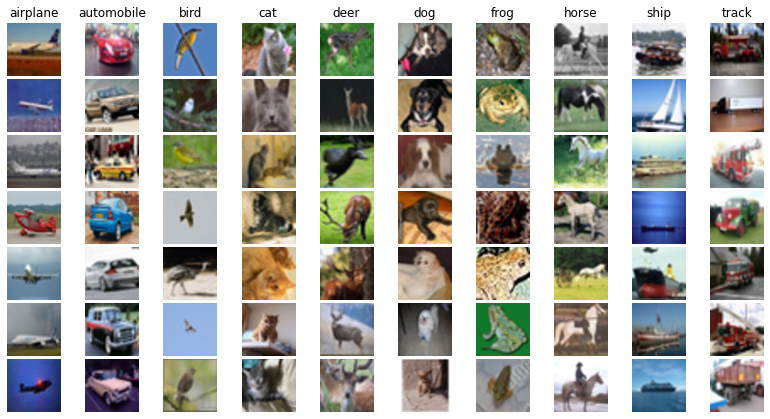

In [163]:

plt.figure(figsize=(12, 6))
plt.subplots_adjust(0, 0, 0.9, 0.9, wspace=0.05, hspace=0.05)
samples_per_class = 7
num_classes = len(class_names)
for c, class_name in enumerate(class_names):
    idxes = np.flatnonzero(y_train == c)
    samples_idxes = np.random.choice(idxes, samples_per_class, replace=False)
    for i, idx in enumerate(samples_idxes):
        plt_idx = i * num_classes + c + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8), interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[c])

# Operations on numpy arrays

In [164]:
A = np.array([[1,2,3], [4,5,6]])
print(A)

[[1.00 2.00 3.00]
 [4.00 5.00 6.00]]


In [165]:
print(A.shape)

(2, 3)


In [166]:
print(A.shape[1])

3


In [167]:
print(np.reshape(A, (1, -1)))

[[1.00 2.00 3.00 4.00 5.00 6.00]]


In [168]:
print(x)

[1.00 2.00 3.00]


In [169]:
print(x[:, None])

[[1.00]
 [2.00]
 [3.00]]


In [170]:
print(x.ndim)

1


In [171]:
print(A.ndim)

2


In [172]:
print(A.size)

6


In [173]:
print(A.itemsize)

8


In [174]:
x = np.arange(1, 21, 2)
print(x)

[1.00 3.00 5.00 7.00 9.00 11.00 13.00 15.00 17.00 19.00]


In [175]:
x = np.linspace(1, 2, num=5)
print(x)  

[1.00 1.25 1.50 1.75 2.00]


In [176]:
x = np.logspace(1, 5, num=5, base=2)
print(x)

[2.00 4.00 8.00 16.00 32.00]


In [177]:
np.set_printoptions(precision=2)

In [178]:
print(np.zeros(shape=(4,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [179]:
print(np.ones(shape=(4,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [180]:
print(np.full(shape=(4,4), fill_value=4))

[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


In [181]:
print(np.random.randn(2,4))

[[-1.2   1.41  0.45  0.64]
 [ 0.91  0.17  0.21  1.03]]


# matplot

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt

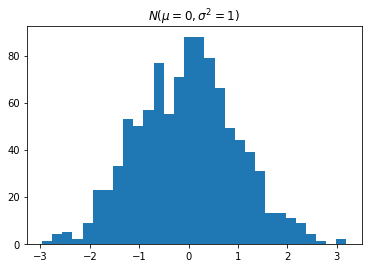

In [183]:
x = np.random.randn(1000)
plt.hist(x, bins=30)
plt.title("$N(\mu=0, \sigma^2=1)$")
plt.show()

In [184]:
b = np.random.randint(2, size=(1,20))
print(b)

[[0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1]]


In [185]:
print(np.count_nonzero(b))

6


In [186]:
x = np.array([[1,2,3], [4,6,7]])
print(x)
print()
print(x.T)

[[1 2 3]
 [4 6 7]]

[[1 4]
 [2 6]
 [3 7]]


In [187]:
for func in (x.min, x.max, x.sum, x.mean, x.std, x.var):
  print(func.__name__, '=', func())

min = 1
max = 7
sum = 23
mean = 3.8333333333333335
std = 2.1147629234082532
var = 4.472222222222222


In [188]:
print(np.sum(x, axis=(0,1)))

23


In [189]:
print(np.mean(x, axis=0))

[2.5 4.  5. ]


In [190]:
x = np.arange(5).reshape(1,1,5)
print(x)

[[[0 1 2 3 4]]]


In [191]:
x = np.arange(1,13).reshape(4,3)
print(x)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [192]:
v = np.array([1,0,1])
y = np.zeros_like(x)
for i in range(4):
  y[i, :] = x[i, :]+ v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [193]:
y = x + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


### Stack

In [194]:
A  = np.full((3,4), 1)
print(A)
print()
B = np.full((3,4), 2)
print(B)
print()
print(np.hstack((A, B)))

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]

[[1 1 1 1 2 2 2 2]
 [1 1 1 1 2 2 2 2]
 [1 1 1 1 2 2 2 2]]


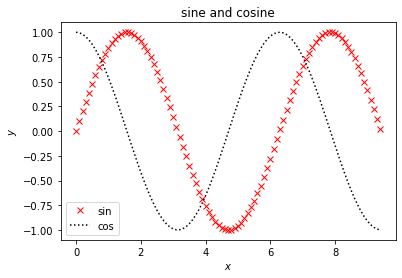

In [195]:
x = np.arange(0, 3*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, 'rx')
plt.plot(x, y2, 'k:')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('sine and cosine')
plt.legend(['sin', 'cos']);

# Scikit Learn -- sklearn

In [196]:
from sklearn.datasets import load_iris
iris = load_iris()

In [197]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [199]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [200]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [201]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [203]:
print(np.unique(iris.target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


In [207]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


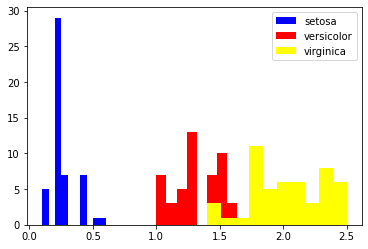

In [221]:
colors = ['blue', 'red', 'yellow']
x_index = 3
for label, color in zip(range(len(iris.target_names)) , colors):
  plt.hist(iris.data[iris.target==label, x_index],
           label=iris.target_names[label], 
           color=color)

plt.legend()
plt.show()

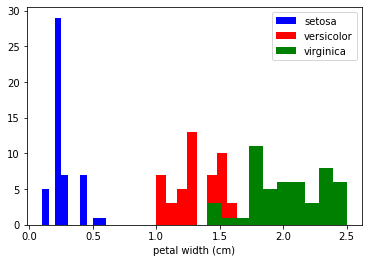

In [219]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):  # [(0, 'blue'), (1, 'red'), (2, 'green')]
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

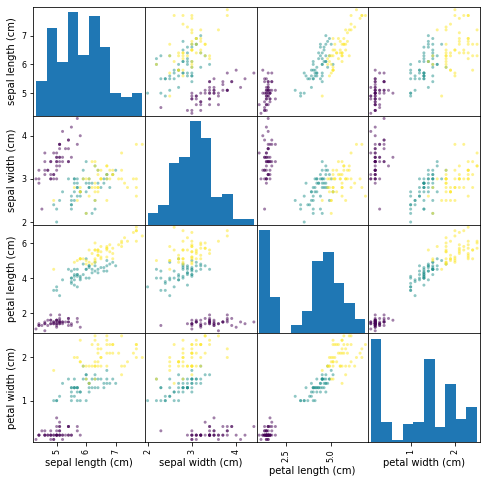

In [225]:
import pandas as pd
iris_df = pd.DataFrame( iris.data, columns= iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c= iris.target, figsize=(8,8));

In [227]:
from sklearn import datasets
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [230]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [231]:
print(digits.target)

[0 1 2 ... 8 9 8]


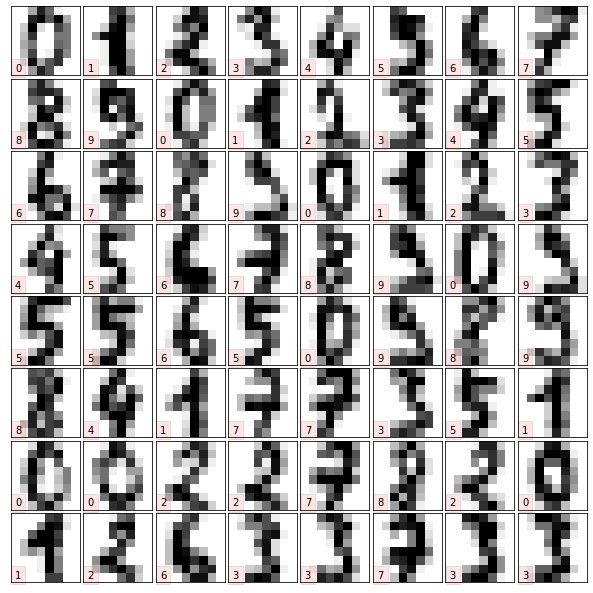

In [232]:
# set up the figure
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]), bbox=dict(facecolor='red', alpha=0.1))